In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import ToPILImage

sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *


data_root = r"C:\Data\cosine\insilico_experiments\Most_active_vs_random\results\cosine_test_2023-06-08_18-13"
save_root = r"C:\Data\cosine\insilico_experiments\Most_active_vs_random\results\posthock_cosine_test"
if not os.path.exists(save_root):
    os.makedirs(save_root)

In [7]:
expriment_meta_data_df = pd.read_hdf(os.path.join(data_root, "expriment_meta_data_df.h5"), key="expriment_meta_data_df")
expriment_meta_data_df_post_hock = expriment_meta_data_df

FileNotFoundError: File C:\Data\cosine\insilico_experiments\BigGAN_reconstruction_test1\meta_data_files\expriment_meta_data_df.h5 does not exist

Text(0.5, 1.0, 'cosine \n Top Activated')

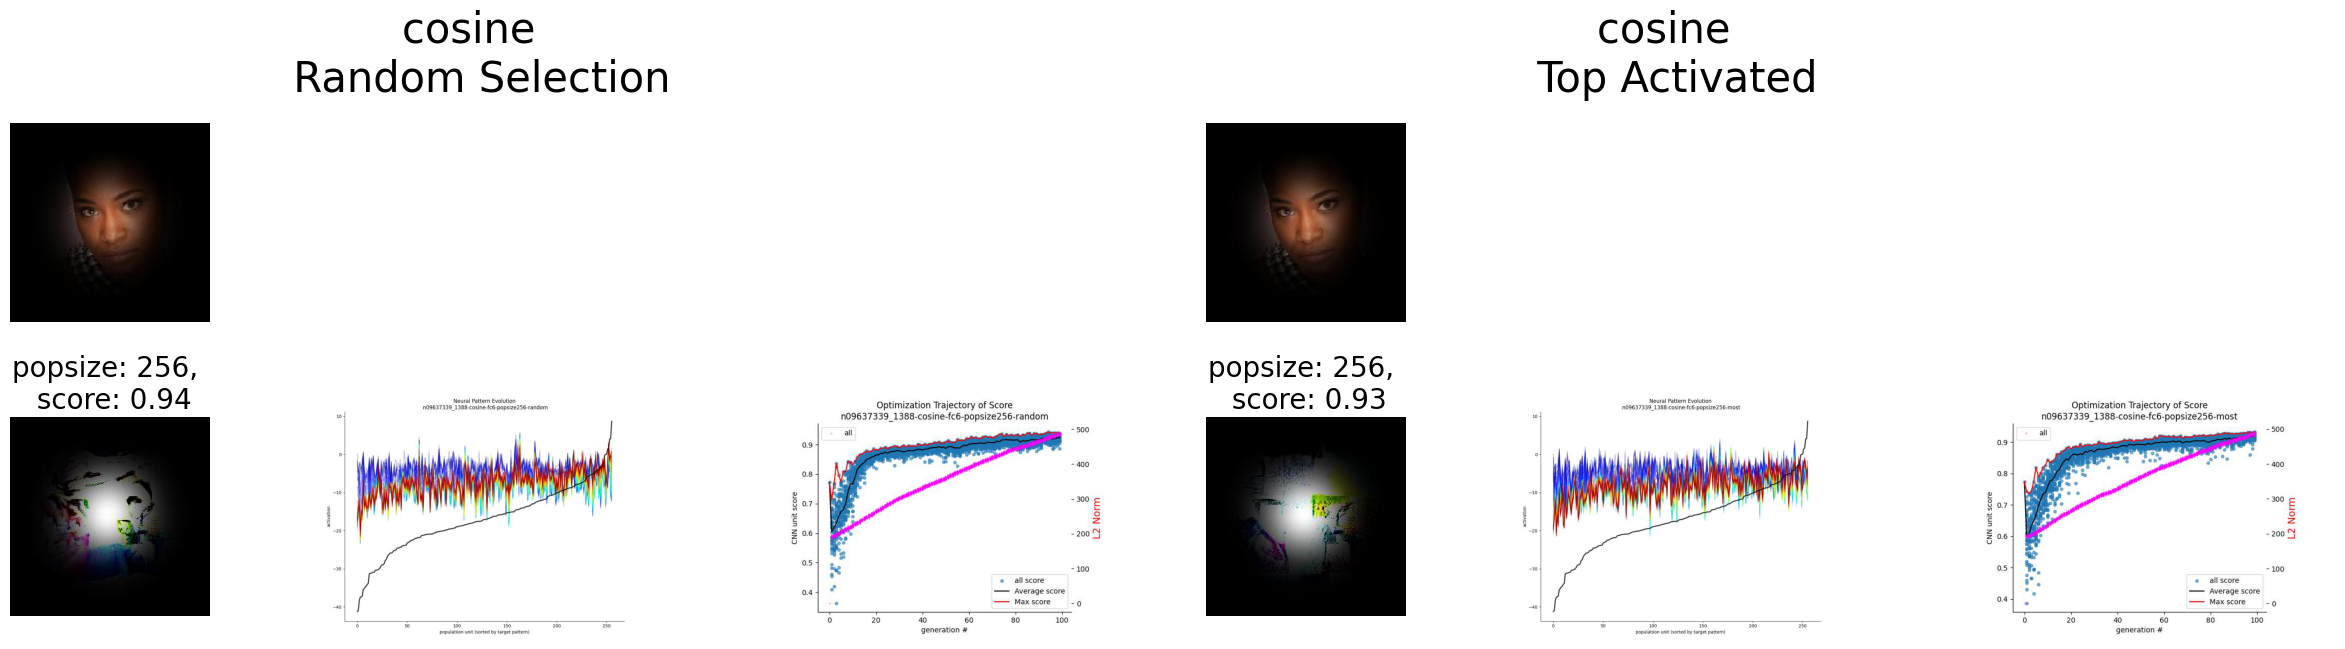

In [10]:
# let cheack what'd the deal with cosine similarity
from torchvision.transforms import ToPILImage
metric_name = "cosine"
selectoin_type = ["random", "most"]
image_name = "n09637339_1388"
# loop over all population sizes
popsize = 256
pop_resamplim_id = 1
regen_id = 0
# subplot os 4 rows and 2 columns with ratio of 1:2 for the width of the columns
fig_, ax_ = plt.subplots(2, 6, figsize=(30, 7), gridspec_kw={'width_ratios': [1, 2, 2,1,2,2]})


target_image = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                        output_type="target_img_RF_masked", sub_pop_type="random", trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id)
# load the image
last_gen_image = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="best_gen_imgs_RF_masked", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
activity_matching_tragectory = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="popul_act_evol", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
score_tragectory = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="optimization_trajectory", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
optimazatoin_score = column_inquary("score", expriment_meta_data_df_post_hock, 
                                pop_size=popsize, output_type="best_gen_imgs_RF_masked", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)

# plot the images in a row
ax_[1, 0].imshow(ToPILImage()(last_gen_image))
ax_[1, 0].set_title(f"popsize: {popsize}, \n score: {optimazatoin_score:.2f}", fontsize=20)
ax_[1, 0].axis("off")
# plot the activity matching tragectory
ax_[1, 1].imshow(ToPILImage()(activity_matching_tragectory))
ax_[1, 1].axis("off")
# plot the score tragectory
ax_[1, 2].imshow(ToPILImage()(score_tragectory))
ax_[1, 2].axis("off")


last_gen_image = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="best_gen_imgs_RF_masked", sub_pop_type="most", similarity_metric=metric_name, trget_imge_name=image_name,\
                                gen_rerun_id=regen_id)
activity_matching_tragectory = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="popul_act_evol", sub_pop_type="most", similarity_metric=metric_name, trget_imge_name=image_name,\
                                gen_rerun_id=regen_id)
score_tragectory = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="optimization_trajectory", sub_pop_type="most", similarity_metric=metric_name, trget_imge_name=image_name,\
                                gen_rerun_id=regen_id)
optimazatoin_score = column_inquary("score", expriment_meta_data_df_post_hock, 
                                pop_size=popsize, output_type="best_gen_imgs_RF_masked", sub_pop_type="most", similarity_metric=metric_name, trget_imge_name=image_name,\
                                gen_rerun_id=regen_id)


# plot the images in a row
ax_[1, 3].imshow(ToPILImage()(last_gen_image))
ax_[1, 3].set_title(f"popsize: {popsize}, \n score: {optimazatoin_score:.2f}", fontsize=20)
ax_[1, 3].axis("off")
# plot the activity matching tragectory
ax_[1, 4].imshow(ToPILImage()(activity_matching_tragectory))
ax_[1, 4].axis("off")
# plot the score tragectory
ax_[1, 5].imshow(ToPILImage()(score_tragectory))
ax_[1, 5].axis("off")
for i in range(6):
        ax_[0, i].axis("off")
ax_[0,0].imshow(ToPILImage()(target_image))
ax_[0,1].set_title(f"{metric_name} \n Random Selection", fontsize=30)
ax_[0,3].imshow(ToPILImage()(target_image))
ax_[0,4].set_title(f"{metric_name} \n Top Activated", fontsize=30)

In [89]:
expriment_meta_data_df_post_hock[expriment_meta_data_df_post_hock.index == "1686262753_2773712"]

,output_type,trget_imge_name,similarity_metric,pop_size,pop_resampling_id,gan_name,layer_name,layer_short,net_name,img_size,pading_size,input_size,score,pop_unit_idx,sub_pop_type,gen_rerun_id
1686262753_2773712,popul_act_evol,n09637339_1388,cosine,256,4,fc6,.features.Conv2d10,conv5,alexnet,None,"(20, 20)","(3, 227, 227)",NaN,"[84, 253, 422, 591, 760, 929, 1098, 1267, 1436...",random,3


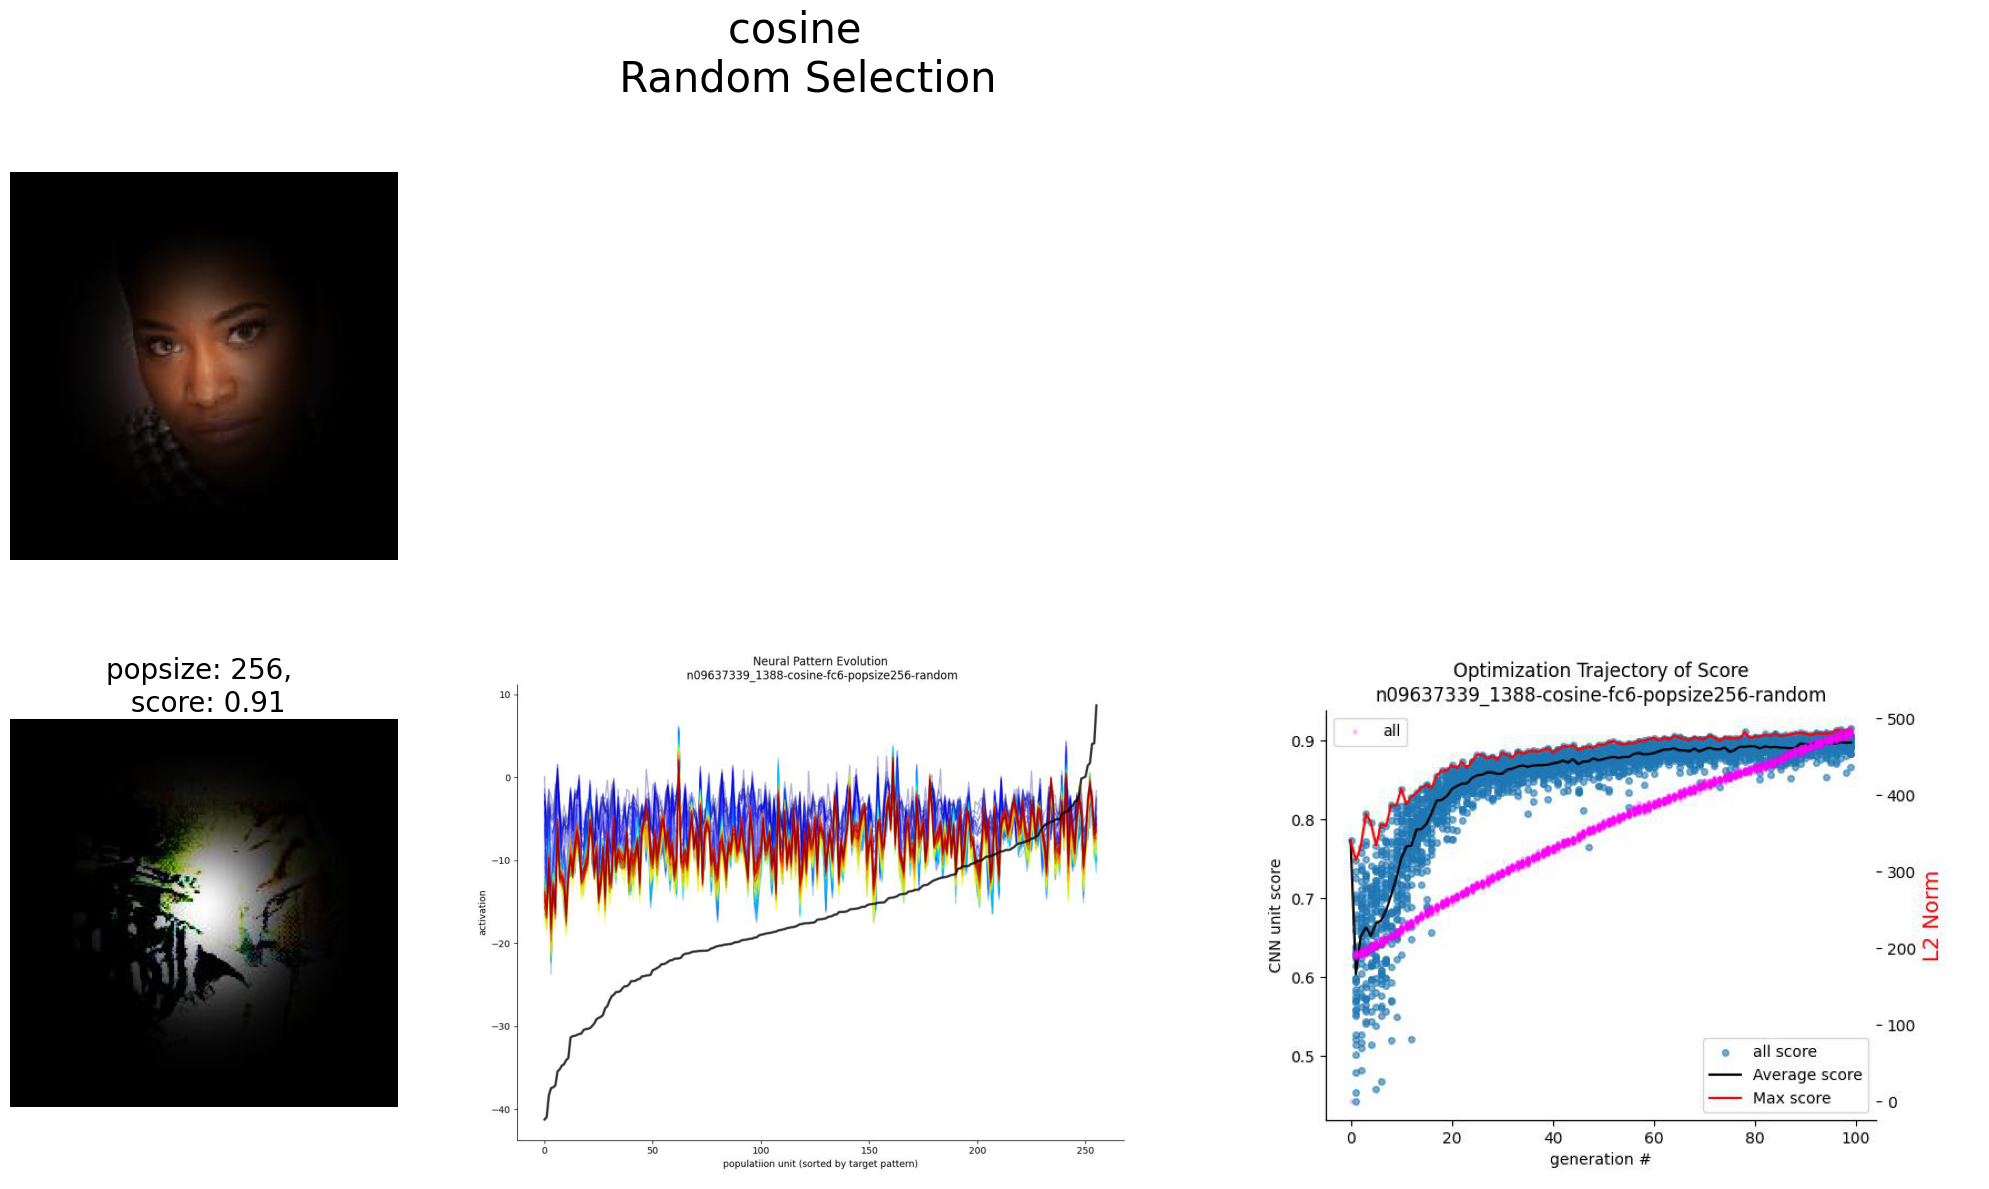

In [117]:
# let cheack what'd the deal with cosine similarity
from torchvision.transforms import ToPILImage
def get_row( data_table, **kwargs):
    # find the row in the dataframe that match the input kwargs, the colums which are not mentioned in the kwargs are None
    row = data_table.loc[(data_table[list(kwargs)] == pd.Series(kwargs)).all(axis=1)]
    # if the row is empty return None
    if len(row) != 1:
        raise ValueError(f"the input kwargs: {kwargs} does not match any row in the dataframe or match more than one row")
    # if the row is not empty load the image
    else:
        return row
    
    
metric_name = "cosine"
image_name = "n09637339_1388"
# loop over all population sizes
popsize = 256
pop_resamplim_id = 4
regen_id = 0
# subplot os 4 rows and 2 columns with ratio of 1:2 for the width of the columns
fig_, ax_ = plt.subplots(2, 3, figsize=(20, 12), gridspec_kw={'width_ratios': [1, 2, 2]})


target_image = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                        output_type="target_img_RF_masked", sub_pop_type="random", trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id)
# load the image
last_gen_image = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="best_gen_imgs_RF_masked", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
activity_matching_tragectory = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="popul_act_evol", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
score_tragectory = load_image_tsr(expriment_meta_data_df_post_hock, data_root, pop_size=popsize,\
                                output_type="optimization_trajectory", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
optimazatoin_score = column_inquary("score", expriment_meta_data_df_post_hock, 
                                pop_size=popsize, output_type="best_gen_imgs_RF_masked", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                                pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)

file_name_row = get_row( expriment_meta_data_df_post_hock, 
                        pop_size=popsize, output_type="generation_data", sub_pop_type="random", similarity_metric=metric_name, trget_imge_name=image_name,\
                        pop_resampling_id=pop_resamplim_id, gen_rerun_id=regen_id)
# load npz data file
npz_file = np.load(os.path.join(data_root, f"{file_name_row.index[0]}.npz"))
# plot the images in a row
ax_[1, 0].imshow(ToPILImage()(last_gen_image))
ax_[1, 0].set_title(f"popsize: {popsize}, \n score: {optimazatoin_score:.2f}", fontsize=20)
ax_[1, 0].axis("off")
# plot the activity matching tragectory
ax_[1, 1].imshow(ToPILImage()(activity_matching_tragectory))
ax_[1, 1].axis("off")
# plot the score tragectory
ax_[1, 2].imshow(ToPILImage()(score_tragectory))
ax_[1, 2].axis("off")
for i in range(3):
        ax_[0, i].axis("off")
ax_[0,0].imshow(ToPILImage()(target_image))
ax_[0,1].set_title(f"{metric_name} \n Random Selection", fontsize=30)
# save the figure with tight layout
fig_.tight_layout()
fig_.savefig(os.path.join(save_root, f"funny_cosine_{metric_name}.png"), dpi=300)


Layer .features.Conv2d10 Sampled 256 units from feature tensor of shape (256, 13, 13)
Gaussian Fitting center (110.2, 110.8)
 Cov mat XX 847.3 YY 813.0 XY -12.9


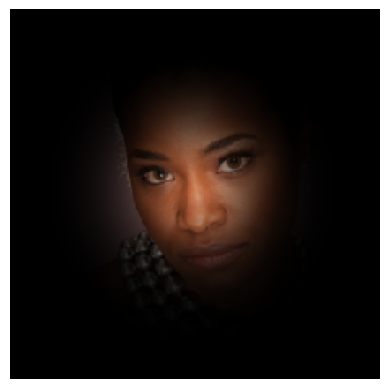

In [110]:
from datetime import datetime
import os
import pandas as pd
import sys
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.func_lib import *
import matplotlib.pylab as plt
##
import warnings
warnings.filterwarnings("ignore") # becairfull with this

from core.utils.GAN_utils import upconvGAN
from core.utils.Optimizers import CholeskyCMAES
from core.utils.CNN_scorers import TorchScorer, resize_and_pad_tsr
#%% 
# Set parameters
refimgdir = r"C:\Data\cosine\insilico_experiments\papulation_size_effect\data\data_sample"

net_name = "alexnet"
layer_name = ".features.Conv2d10"
layer_short = "conv5"
gan_name = "fc6"
input_size = (3, 227, 227)
img_size = (187, 187)
pading_size = (20, 20) 
popsize = 256
score_method = "cosine"

refimgnms, refimgtsr = load_ref_imgs(
        imgdir=refimgdir, preprocess_type='center_crop', image_size=227)
imgid = 9
targnm, target_imgtsr = refimgnms[imgid], refimgtsr[imgid:imgid + 1]
G = upconvGAN(gan_name).cuda()
G.requires_grad_(False)
code_length = G.codelen

scorer_random = TorchScorer(net_name)
module_names, module_types, module_spec = get_module_names(
        scorer_random.model, input_size, "cuda", False)
pop_resampling_id = 2
unit_mask_dict_random, unit_tsridx_dict_random = set_random_population_recording(
                    scorer_random, [layer_name], popsize=popsize, seed=pop_resampling_id)
fitdict_random = fr_estimatir(scorer_random, G, unit_tsridx_dict_random, layer_name, input_size,show_fig=False)
targ_actmat, target_imgtsr_resized = encode_image(scorer_random, target_imgtsr, key=layer_name,
                        RFresize=True, corner=pading_size, imgsize=img_size)
targlabel = os.path.splitext(targnm)[0]

target_imgtsr_resized_RF_masked =\
        (torch.from_numpy(np.absolute(fitdict_random["fitmap"][None,:,:])) / fitdict_random["fitmap"].max()) *\
        target_imgtsr_resized

# showt the tensor image 
plt.imshow(ToPILImage()(target_imgtsr_resized_RF_masked[0]))
plt.axis("off")
plt.show()

title_str = f"{targnm}-{popsize}-{score_method}-{layer_short}-{gan_name}"
#set objective function
objfunc = set_objective(score_method, targ_actmat, popul_mask=None, normalize=False)

In [112]:


scores_all = npz_file["scores_all"]
actmat_all = npz_file["actmat_all"]
generations= npz_file["generations"]

last_gen_actmat = actmat_all[-1, :]
first_gen_actmat = actmat_all[0, :]
targ_actmat_reshaped = targ_actmat[0]


cosine similarty of last gen and target: 0.9512010812759399
corrcoef similarty of first gen and target: 0.7730368375778198 


cosine similarty of last gen and target: 0.7635930266602491
corrcoef similarty of first gen and target: 0.03340776449730215


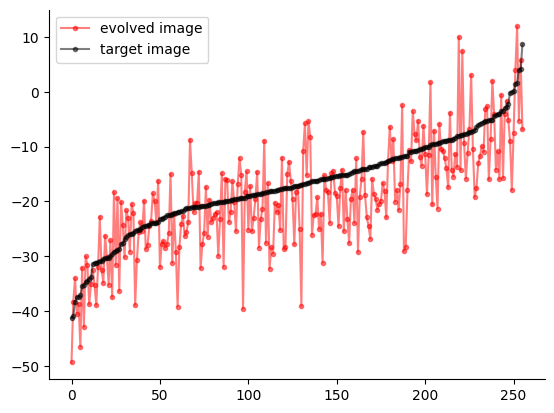

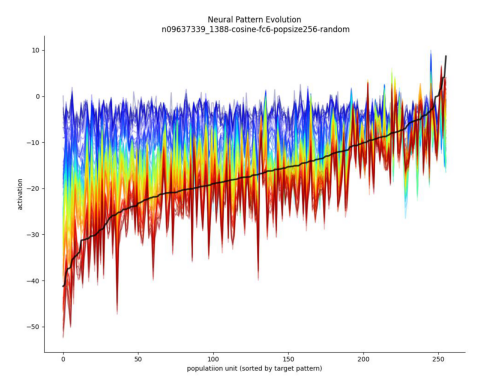

In [115]:
# funtion for cosine similarity of two np arrays
def cos_sim(a, b):
    return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

# function for pearson correlation of two np arrays
def pearson_cor(a, b):
    return np.corrcoef(a, b)[0, 1]


print(f"cosine similarty of last gen and target: {cos_sim(last_gen_actmat, targ_actmat_reshaped)}")
print(f"corrcoef similarty of first gen and target: {cos_sim(first_gen_actmat, targ_actmat_reshaped)} \n\n")

print(f"cosine similarty of last gen and target: {pearson_cor(last_gen_actmat, targ_actmat_reshaped)}")
print(f"corrcoef similarty of first gen and target: {pearson_cor(first_gen_actmat, targ_actmat_reshaped)}")

# sort targ_actmat_reshaped and them permute the last_gen_actmat
sorted_targ_actmat_reshaped = np.sort(targ_actmat_reshaped)
sorted_last_gen_actmat = last_gen_actmat[np.argsort(targ_actmat_reshaped)]


# plot the sorted actmat with points
plt.plot(sorted_last_gen_actmat, c= "red",label="evolved image", alpha=0.5, marker=".")
plt.plot(sorted_targ_actmat_reshaped, c="black", label="target image", alpha=0.5, marker=".")

plt.legend()
plt.show()

plt.imshow(ToPILImage()(activity_matching_tragectory))
plt.axis("off")
plt.show()

